<a href="https://colab.research.google.com/github/kunji1999/Data-Science/blob/main/exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [ ]:
movies= pd.read_csv("movie_metadata.csv")

In [ ]:
#print the first few with headers 
print(movies.head(5))

  imdb_title_id  ... reviews_from_critics
0     tt0000009  ...                  2.0
1     tt0000574  ...                  7.0
2     tt0001892  ...                  2.0
3     tt0002101  ...                  3.0
4     tt0002130  ...                 14.0

[5 rows x 22 columns]


In [ ]:
#discriptive statistics
print(movies.describe())

       num_critic_for_reviews     duration  ...  aspect_ratio  movie_facebook_likes
count             4993.000000  5028.000000  ...   4714.000000           5043.000000
mean               140.194272   107.201074  ...      2.220403           7525.964505
std                121.601675    25.197441  ...      1.385113          19320.445110
min                  1.000000     7.000000  ...      1.180000              0.000000
25%                 50.000000    93.000000  ...      1.850000              0.000000
50%                110.000000   103.000000  ...      2.350000            166.000000
75%                195.000000   118.000000  ...      2.350000           3000.000000
max                813.000000   511.000000  ...     16.000000         349000.000000

[8 rows x 16 columns]


In [ ]:
#check the column name
print("column names:%s" %movies.columns.values)

column names:['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


In [ ]:
print(movies.dtypes)
print(movies.shape)

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
#check null data
print("null value:\n")
print(movies.isna()) #same as movies.isnull().sum()
print(movies.isna().sum())
print("null values %s" %movies.isnull().values.any())
print("null values %s"%movies.isna().sum().sum())
print(movies.describe())

null value:

       imdb_title_id  title  ...  reviews_from_users  reviews_from_critics
0              False  False  ...               False                 False
1              False  False  ...               False                 False
2              False  False  ...               False                 False
3              False  False  ...               False                 False
4              False  False  ...               False                 False
...              ...    ...  ...                 ...                   ...
85850          False  False  ...                True                 False
85851          False  False  ...               False                 False
85852          False  False  ...                True                  True
85853          False  False  ...                True                  True
85854          False  False  ...                True                 False

[85855 rows x 22 columns]
imdb_title_id                0
title                        

In [ ]:
#clean the dataset by droping the na values
clean_movies=movies.dropna(how='any')
movies=movies.dropna(how='any')

In [ ]:
print(clean_movies.shape)

(3756, 28)


In [ ]:
#use fillna attribute of pandas
#for filling up missing values in all columns
movies.fillna(value=0,inplace=True)


In [ ]:
#for this dataframe we can 'missing' in the columns of object data types for example language
movies['language'].fillna("no info",inplace=True)
print("null values", movies.isna().sum()) 

null values color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64


In [ ]:
# check if there are duplicate rows or not 

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

duplicate_rows = movies[movies.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (33, 28)


In [ ]:
#+ discretization or binning
#+++++++++++++++++++++++++++++++++++++++++++++++

print (movies['imdb_score'][5:10])
# check the miminmum value of all columns
print ("minimum values of all cloumn:") 
print (movies.min())


6     6.2
7     7.8
8     7.5
9     7.5
10    6.9
Name: imdb_score, dtype: float64
minimum values of all cloumn:
color                                                          Black and White
director_name                                                  Aaron Schneider
num_critic_for_reviews                                                       2
duration                                                                    37
director_facebook_likes                                                      0
actor_3_facebook_likes                                                       0
actor_2_name                                                           50 Cent
actor_1_facebook_likes                                                       0
gross                                                                      162
genres                                                                  Action
actor_1_name                                                           50 Cent
movie_title       

In [ ]:
print (movies['imdb_score'].idxmax())
print (movies.loc[movies['imdb_score'].idxmax(), 'movie_title'])
print (movies['movie_title'].loc[2764:2767])
print (movies[['movie_title','budget']].loc[2986:2990])


1937
The Shawshank Redemption 
2764           Pretty Woman 
2766    Crocodile Dundee II 
Name: movie_title, dtype: object
       movie_title        budget
2986   Two Lovers   1.200000e+07
2987  Last Orders   1.200000e+07
2988     The Host   1.221550e+10
2990     Ravenous   1.200000e+07


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


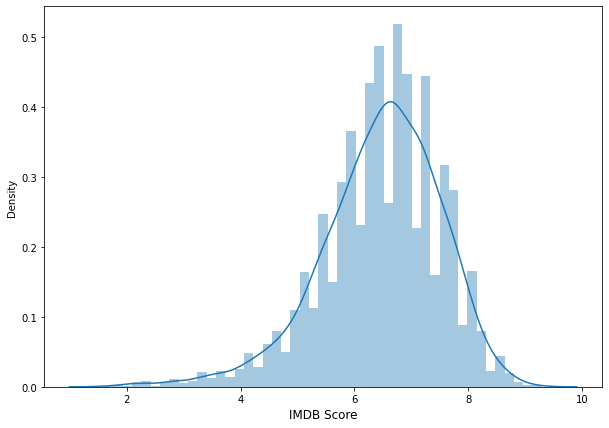

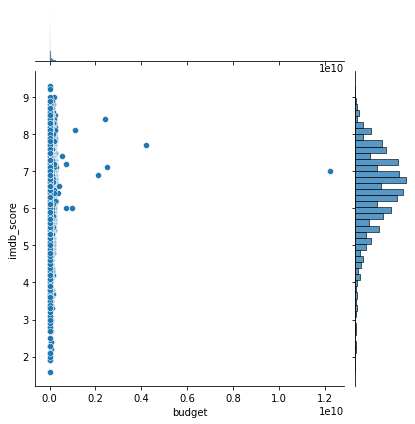

In [ ]:
# check the distribution of imdb score
fig = plt.figure(figsize=(10,7))
sns.distplot(movies['imdb_score'])
plt.xlabel('IMDB Score', fontsize=12)
sns.jointplot(x='budget', y='imdb_score', data=movies); 
plt.show()

In [ ]:
# based on the 'imdb_score' we will discritize the movies in 3 categories ['shyte', 'moderate', 'good']
# similar with pd.cut method described in McKinney's book
op_labels = ['bad', 'moderate', 'good']
category = [0.,4.,7.,10.]
movies['imdb_labels'] = pd.cut(movies['imdb_score'], labels=op_labels, bins=category, include_lowest=False)
print (movies[['movie_title', 'imdb_score', 'imdb_labels']][209:220])


                                 movie_title  imdb_score imdb_labels
218          How the Grinch Stole Christmas          6.0    moderate
219                  The Day After Tomorrow          6.4    moderate
220                  Mission: Impossible II          6.1    moderate
221                       The Perfect Storm          6.4    moderate
222  Fantastic 4: Rise of the Silver Surfer          5.6    moderate
223                              Life of Pi          8.0        good
224                             Ghost Rider          5.2    moderate
225                            Jason Bourne          7.1        good
226         Charlie's Angels: Full Throttle          4.8    moderate
227                              Prometheus          7.0    moderate
228                         Stuart Little 2          5.4    moderate


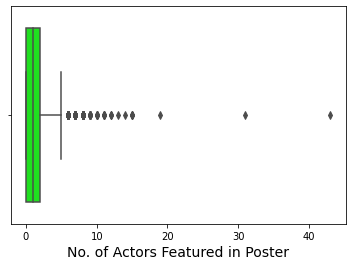

In [ ]:
#____OUTLIER_______________________________________
# First check with box plot 
#___________________________________________

# let's try to plot boxplot with seaborn 
sns.boxplot(x=movies['facenumber_in_poster'], color='lime')
plt.xlabel('No. of Actors Featured in Poster', fontsize=14)
plt.show()


In [ ]:
print (movies['facenumber_in_poster'].min())
print (movies['facenumber_in_poster'].idxmax())
print (movies[['movie_title', 'facenumber_in_poster']].iloc[movies['facenumber_in_poster'].idxmax()])
print (movies['facenumber_in_poster'].describe())
# budget column is massively varying. so we are in dire need to drop outliers
#best option for dropping outliers is to use zscore method and reject all rows in non-object type columns


0.0
3468
movie_title             Witchboard 
facenumber_in_poster              1
Name: 4280, dtype: object
count    3756.000000
mean        1.377263
std         2.041541
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: facenumber_in_poster, dtype: float64


In [ ]:
#____________________________________________________________________________________
# Use Z Score from Scipy Stats 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
#____________________________________________________________________________________
# will try first using the z score method 
# z score is basically how many standard deviation away a point is from the mean. Closer the value of z is towards 0, the data point is closer to the mean. 

#first detect outlier for a particular column

print (movies.dtypes)
movies_num = movies.select_dtypes(exclude=['object'])
print (movies_num.shape )
# 12 object type columns were dropped.


color                          object
director_name                  object
num_critic_for_reviews        float64
duration                      float64
director_facebook_likes       float64
actor_3_facebook_likes        float64
actor_2_name                   object
actor_1_facebook_likes        float64
gross                         float64
genres                         object
actor_1_name                   object
movie_title                    object
num_voted_users                 int64
cast_total_facebook_likes       int64
actor_3_name                   object
facenumber_in_poster          float64
plot_keywords                  object
movie_imdb_link                object
num_user_for_reviews          float64
language                       object
country                        object
content_rating                 object
budget                        float64
title_year                    float64
actor_2_facebook_likes        float64
imdb_score                    float64
aspect_ratio

In [ ]:
movies_num

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_labels
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,good
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,good
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,moderate
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,good
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,81.0,110.0,107.0,45.0,576.0,136007.0,3924,776,1.0,39.0,4500.0,2004.0,133.0,6.9,2.35,171,moderate
5027,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,26.0,10000.0,2000.0,0.0,7.5,1.85,697,good
5033,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,7000.0,2004.0,45.0,7.0,1.85,19000,moderate
5035,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,7000.0,1992.0,20.0,6.9,1.37,0,moderate


In [ ]:
from scipy.stats import zscore

numeric_cols = movies_num.select_dtypes(include=[np.number]).columns
movies_num[numeric_cols].apply(zscore)

#print(movies_df_num.apply(zscore))


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4.501308,2.991649,-0.263168,0.044203,-0.435085,10.068384,5.133549,-0.350064,-0.674709,6.608312,0.844159,0.609240,-0.238931,1.358498,-0.937662,1.101870
1,1.090623,2.594188,-0.079646,0.120761,2.078243,3.652351,2.403663,1.925921,-0.674709,2.191675,1.122944,0.406950,0.655375,0.600998,0.676973,-0.435872
2,3.521040,1.666778,-0.263168,-0.322218,0.209358,2.097347,1.118581,0.009043,-0.184818,1.598250,0.879560,1.216110,-0.358421,0.316936,0.676973,3.524979
3,5.230433,2.373376,6.908181,11.736403,1.240467,5.625462,6.831623,4.980844,-0.674709,5.749791,0.901686,0.912675,4.616379,1.926622,0.676973,7.206241
5,2.386845,0.960179,-0.108332,-0.127392,-0.458285,0.290802,0.699781,-0.504931,-0.184818,0.975641,0.962311,0.912675,-0.305828,0.127561,0.676973,0.682486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,-0.699785,-0.011393,-0.228289,-0.383464,-0.462410,-0.746379,-0.670346,-0.562307,-0.184818,-0.724375,-0.204586,0.103515,-0.415636,0.411623,0.676973,-0.427904
5027,-0.837508,-0.894641,-0.133758,-0.407223,-0.499207,-0.738731,-0.666195,-0.602632,-0.674709,-0.755992,-0.204562,-0.301065,-0.444903,0.979748,-0.739374,-0.403393
5033,-0.197498,-1.468752,-0.168310,-0.402999,-0.480776,-0.742272,-0.218319,-0.583646,-0.674709,0.083072,-0.204575,0.103515,-0.435001,0.506311,-0.739374,0.449495
5035,-0.902319,-1.292103,-0.263168,-0.404055,-0.491732,-0.719286,-0.353726,-0.595205,-0.674709,-0.503057,-0.204575,-1.110226,-0.440502,0.411623,-2.099066,-0.435872


In [ ]:
#use z score for all columns in the new data frame 
movies_Zscore = movies_num[(np.abs(movies_num[numeric_cols].apply(zscore))<=3).all(axis=1)]
print ("shape after rejecting outliers: ")
print(movies_Zscore.shape)
movies_Zscore_usr_rev = movies_num[(np.abs(stats.zscore(movies_num[['num_user_for_reviews']]))<=3).all(axis=1)]
print (type(movies_Zscore_usr_rev))


shape after rejecting outliers: 
(3113, 17)
<class 'pandas.core.frame.DataFrame'>


After removing Outlier


NameError: ignored

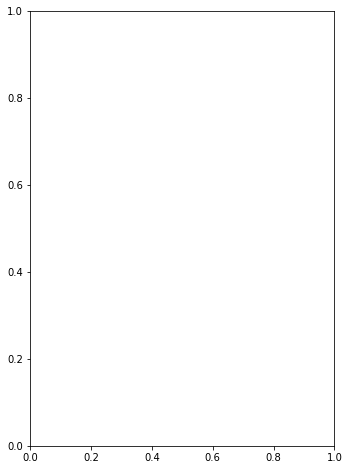

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x=movies_df['num_user_for_reviews'], color='lime')
plt.xlabel('No. of Actors Featured in Poster (After Using Z Score)', fontsize=14)
plt.subplot(1,2,2)
sns.distplot(movies_df_Zscore['num_user_for_reviews'], color='lime')
plt.tight_layout()
plt.show()